# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# conda install scipy --force-reinstall
# !conda install -c conda-forge liblapack -y

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Splitting dataset

In [10]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state=123)
X_train, y_train = train_df.drop(columns=["booking_complete"]), train_df["booking_complete"] 
X_test, y_test = test_df.drop(columns=["booking_complete"]), test_df["booking_complete"] 
display(train_df.head())
display(train_df.info())

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
6105,1,Internet,RoundTrip,26,21,6,3,COKMEL,Australia,1,1,1,8.83,0
9940,1,Internet,RoundTrip,9,25,5,3,DMKPER,Australia,0,0,0,5.62,0
45421,2,Internet,RoundTrip,92,6,0,4,DPSMEL,Australia,1,0,0,8.83,0
42236,7,Internet,RoundTrip,40,5,21,7,TPETWU,Taiwan,0,0,0,4.67,0
15382,1,Internet,RoundTrip,1,60,6,6,JHBKTM,Malaysia,1,0,0,4.75,1


<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 6105 to 15725
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         37500 non-null  int64  
 1   sales_channel          37500 non-null  object 
 2   trip_type              37500 non-null  object 
 3   purchase_lead          37500 non-null  int64  
 4   length_of_stay         37500 non-null  int64  
 5   flight_hour            37500 non-null  int64  
 6   flight_day             37500 non-null  int64  
 7   route                  37500 non-null  object 
 8   booking_origin         37500 non-null  object 
 9   wants_extra_baggage    37500 non-null  int64  
 10  wants_preferred_seat   37500 non-null  int64  
 11  wants_in_flight_meals  37500 non-null  int64  
 12  flight_duration        37500 non-null  float64
 13  booking_complete       37500 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 4.3+ MB

None

## Features

In [11]:
# Convert categorical column data type to string  
from sklearn.preprocessing import FunctionTransformer 
# https://stackoverflow.com/questions/59476179/is-it-possible-to-change-pandas-column-data-type-within-a-sklearn-pipeline
def to_categorical(x): 
    return pd.DataFrame(x).astype("string")
fun_tr = FunctionTransformer(to_categorical)

In [12]:
print(train_df["flight_day"].value_counts().sort_index())

flight_day
1    6127
2    5777
3    5666
4    5550
5    5092
6    4392
7    4896
Name: count, dtype: int64


In [13]:
# Features
numeric_features = ["num_passengers", "purchase_lead", "length_of_stay", "flight_duration",]
categorical_features = ["sales_channel", "trip_type", "route", "booking_origin",]
binary_features = ["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals",]
ordinal_features = ["flight_hour", "flight_day",]
drop_features = []
target_column = ["booking_complete"]

## Transformers

In [14]:
# Transformers
numeric_transformer = StandardScaler()
categorical_transformer = make_pipeline(fun_tr, OneHotEncoder(handle_unknown="ignore", sparse_output=False),)
binary_transformer = make_pipeline(fun_tr, OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop = "if_binary"),)
ordinal_transformer = OrdinalEncoder()

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features),
    (ordinal_transformer, ordinal_features),
)
preprocessor.fit(X_train)
display(preprocessor)

ColumnTransformer(transformers=[('drop', 'drop', []),
                                ('standardscaler', StandardScaler(),
                                 ['num_passengers', 'purchase_lead',
                                  'length_of_stay', 'flight_duration']),
                                ('pipeline-1',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_categorical at 0x16c9aeac0>)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)...
                                ('pipeline-2',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_categorical at 0x16c9aeac0>)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['wants_extra_baggage', 'wants_preferred_seat',
                                  'wants_in_flight_meals']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['flight_hour', 'flight_day'])])

In [15]:
categorical_features_cols = list(preprocessor.named_transformers_["pipeline-1"].named_steps["onehotencoder"].get_feature_names_out(categorical_features))

new_columns = (
    numeric_features + 
    categorical_features_cols + 
    binary_features + 
    ordinal_features
)
# new_columns

X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,num_passengers,purchase_lead,length_of_stay,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,...,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_hour,flight_day
6105,-0.579988,-0.651726,-0.062395,1.035540,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0
9940,-0.579988,-0.839737,0.057509,-1.107156,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
45421,0.400649,0.078201,-0.512033,1.035540,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
42236,5.303839,-0.496893,-0.542008,-1.741287,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,6.0
15382,-0.579988,-0.928213,1.106664,-1.687887,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,5.0


In [16]:
# Obtained from Lecture 3 
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

## Baseline model

In [17]:
# Adapted from Lecture 9 
results = {}
scoring_metric = ["accuracy","precision","recall","f1",]  # scoring can be a string, a list, or a dictionary
dummy = make_pipeline(preprocessor, DummyClassifier(random_state = 76))
print()
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, cv = 10, 
    return_train_score = True, scoring = scoring_metric
)
pd.DataFrame(results).T

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.166 (+/- 0.022),0.027 (+/- 0.002),0.850 (+/- 0.000),0.850 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


## Logistic regression model and optimisation

In [18]:
# Adapted from HW4 and Lecture 8 
# (2) 
# https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0
pipe_lr = make_pipeline(preprocessor, LogisticRegression(random_state = 76, max_iter = 200))
# pipe_lr.fit(X_train, y_train)

param_grid_lr = {
    "logisticregression__C": [0.01, 0.1, 1, 10, 100], 
    "logisticregression__class_weight": [{0: 1, 1: x} for x in [0.5, 1, 3, 5, 7]]
}
random_search_lr = RandomizedSearchCV(
    pipe_lr, param_distributions = param_grid_lr, n_iter=10,
    n_jobs = -1, return_train_score = True, random_state = 76,scoring='f1'
)  
random_search_lr.fit(X_train, y_train)

# pd.DataFrame(random_search.cv_results_)[relevant].set_index("rank_test_score").sort_index().T

best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_

print("best_params_lr: " + str(best_params_lr))
print("best_score_lr: " + str(best_score_lr))

# (3)
pipe_lr_opt = make_pipeline(
    preprocessor, 
    LogisticRegression(
        random_state = 76, 
        max_iter = 200, 
        C = best_params_lr["logisticregression__C"],
        class_weight = best_params_lr["logisticregression__class_weight"],
    ))
pipe_lr_opt.fit(X_train, y_train)

results["Logistic Regression"] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, cv = 10, return_train_score = True, scoring = scoring_metric)
results["Logistic Regression (Optimised)"] = mean_std_cross_val_scores(pipe_lr_opt, X_train, y_train, cv = 10, return_train_score = True, scoring = scoring_metric)
pd.DataFrame(results).T

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

best_params_lr: {'logisticregression__class_weight': {0: 1, 1: 5}, 'logisticregression__C': 1}
best_score_lr: 0.4331690766295792


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.166 (+/- 0.022),0.027 (+/- 0.002),0.850 (+/- 0.000),0.850 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Logistic Regression,10.554 (+/- 0.199),0.064 (+/- 0.010),0.849 (+/- 0.003),0.852 (+/- 0.000),0.472 (+/- 0.056),0.527 (+/- 0.006),0.075 (+/- 0.009),0.084 (+/- 0.003),0.129 (+/- 0.015),0.145 (+/- 0.004)
Logistic Regression (Optimised),10.688 (+/- 0.408),0.064 (+/- 0.012),0.723 (+/- 0.005),0.733 (+/- 0.001),0.313 (+/- 0.006),0.328 (+/- 0.001),0.711 (+/- 0.019),0.746 (+/- 0.004),0.434 (+/- 0.008),0.455 (+/- 0.002)


## Decision tree model and optimisation

In [19]:
# Adapted from Lecture 11
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Decision tree 
# Hyperparameters: max_depth 
# https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=76))
# pipe_dt.fit(X_train, y_train)
results["Decision tree"] = mean_std_cross_val_scores(
    pipe_dt, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

param_grid_dt = {
    "decisiontreeclassifier__max_depth": np.arange(1, 20, 4), 
    "decisiontreeclassifier__class_weight": [{0: 1, 1: x} for x in [0.5, 1, 3, 5, 7]]
}
random_search_dt = RandomizedSearchCV(
    pipe_dt, param_distributions = param_grid_dt, n_iter=10,
    n_jobs = -1, return_train_score = True, random_state = 76, scoring='f1'
)  
random_search_dt.fit(X_train, y_train)

best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_
print("best_params_dt: " + str(best_params_dt))
print("best_score_dt: " + str(best_score_dt))

pipe_dt_opt = make_pipeline(
    preprocessor, 
    DecisionTreeClassifier(
        max_depth = best_params_dt["decisiontreeclassifier__max_depth"], 
        class_weight = best_params_dt["decisiontreeclassifier__class_weight"],
        random_state=76
    )
)
results["Decision tree (Optimised)"] = mean_std_cross_val_scores(
    pipe_dt_opt, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)



/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


best_params_dt: {'decisiontreeclassifier__max_depth': 17, 'decisiontreeclassifier__class_weight': {0: 1, 1: 5}}
best_score_dt: 0.39072817635782425


/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


## Random forest model and optimisation

In [20]:
# Random forest 
# Hyperparameters: n_estimators, max_depth, max_features
pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(n_jobs=-1, random_state=76,)
)
# pipe_rf.fit(X_train, y_train)
results["Random forest"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

param_grid_rf = {
    "randomforestclassifier__max_depth": np.arange(1, 20, 4), 
    "randomforestclassifier__n_estimators": [100, 200, 300, 400, 500], 
    "randomforestclassifier__max_features": [5, 10, 15, 20, 25, 30], 
    "randomforestclassifier__class_weight": [{0: 1, 1: x} for x in [0.5, 1, 3, 5, 7]],
}
random_search_rf = RandomizedSearchCV(
    pipe_rf, param_distributions = param_grid_rf, n_iter=10,
    n_jobs = -1, return_train_score = True, random_state = 76, scoring='f1'
)  
random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
print("best_params_rf: " + str(best_params_rf))
print("best_score_rf: " + str(best_score_rf))

pipe_rf_opt = make_pipeline(
    preprocessor, 
    RandomForestClassifier(
        n_estimators = best_params_rf["randomforestclassifier__n_estimators"], 
        max_depth = best_params_rf["randomforestclassifier__max_depth"], 
        max_features = best_params_rf["randomforestclassifier__max_features"], 
        class_weight = best_params_rf["randomforestclassifier__class_weight"],
        n_jobs=-1, random_state=76,
    )
)
results["Random forest (Optimised)"] = mean_std_cross_val_scores(
    pipe_rf_opt, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


best_params_rf: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__max_depth': 17, 'randomforestclassifier__class_weight': {0: 1, 1: 5}}
best_score_rf: 0.34550585011327134


/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


## Tree-based ensemble model model and optimisation

In [21]:
# Tree-based ensemble model (HistGradientBoostingClassifier due to large dataset size) 
# Hyperparameters: learning_rate, max_depth 
pipe_sklearn_histGB = make_pipeline(
    preprocessor,
    HistGradientBoostingClassifier(random_state=76),
)
# pipe_sklearn_histGB.fit(X_train, y_train)
results["sklearn_histGB"] = mean_std_cross_val_scores(
    pipe_sklearn_histGB, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

param_grid_sklearn_histGB = {
    "histgradientboostingclassifier__max_depth": np.arange(1, 20, 4), 
    "histgradientboostingclassifier__learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9,],  
    "histgradientboostingclassifier__class_weight": [{0: 1, 1: x} for x in [0.5, 1, 3, 5, 7]]
}
random_search_sklearn_histGB = RandomizedSearchCV(
    pipe_sklearn_histGB, param_distributions = param_grid_sklearn_histGB, n_iter=10,
    n_jobs = -1, return_train_score = True, random_state = 76,scoring='f1'
)  
random_search_sklearn_histGB.fit(X_train, y_train)

best_params_sklearn_histGB = random_search_sklearn_histGB.best_params_
best_score_sklearn_histGB = random_search_sklearn_histGB.best_score_

print("best_params_sklearn_histGB: " + str(best_params_sklearn_histGB))
print("best_score_sklearn_histGB: " + str(best_score_sklearn_histGB))

pipe_sklearn_histGB_opt = make_pipeline(
    preprocessor,
    HistGradientBoostingClassifier(
        learning_rate = best_params_sklearn_histGB["histgradientboostingclassifier__learning_rate"], 
        max_depth = best_params_sklearn_histGB["histgradientboostingclassifier__max_depth"],
        class_weight = best_params_sklearn_histGB["histgradientboostingclassifier__class_weight"],
        random_state=76
    ),
)
results["sklearn_histGB (Optimised)"] = mean_std_cross_val_scores(
    pipe_sklearn_histGB_opt, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


best_params_sklearn_histGB: {'histgradientboostingclassifier__max_depth': 13, 'histgradientboostingclassifier__learning_rate': 0.1, 'histgradientboostingclassifier__class_weight': {0: 1, 1: 5}}
best_score_sklearn_histGB: 0.4348911165613293


/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [22]:
# Sorting values in order of validation F1-score
pd.DataFrame(results).T.sort_values('test_f1', ascending=False)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
sklearn_histGB (Optimised),8.349 (+/- 0.997),0.058 (+/- 0.006),0.718 (+/- 0.005),0.735 (+/- 0.003),0.311 (+/- 0.006),0.335 (+/- 0.003),0.724 (+/- 0.022),0.780 (+/- 0.006),0.435 (+/- 0.009),0.468 (+/- 0.004)
Logistic Regression (Optimised),10.688 (+/- 0.408),0.064 (+/- 0.012),0.723 (+/- 0.005),0.733 (+/- 0.001),0.313 (+/- 0.006),0.328 (+/- 0.001),0.711 (+/- 0.019),0.746 (+/- 0.004),0.434 (+/- 0.008),0.455 (+/- 0.002)
Decision tree (Optimised),1.331 (+/- 0.035),0.030 (+/- 0.001),0.717 (+/- 0.010),0.788 (+/- 0.011),0.292 (+/- 0.011),0.402 (+/- 0.014),0.627 (+/- 0.022),0.858 (+/- 0.014),0.399 (+/- 0.013),0.548 (+/- 0.013)
Random forest (Optimised),2.731 (+/- 0.137),0.098 (+/- 0.007),0.834 (+/- 0.007),0.873 (+/- 0.004),0.414 (+/- 0.027),0.615 (+/- 0.034),0.265 (+/- 0.046),0.423 (+/- 0.036),0.321 (+/- 0.037),0.499 (+/- 0.018)
Decision tree,2.455 (+/- 0.179),0.031 (+/- 0.001),0.791 (+/- 0.005),1.000 (+/- 0.000),0.308 (+/- 0.016),1.000 (+/- 0.000),0.316 (+/- 0.020),0.999 (+/- 0.000),0.312 (+/- 0.017),1.000 (+/- 0.000)
Random forest,8.501 (+/- 1.552),0.095 (+/- 0.020),0.851 (+/- 0.003),1.000 (+/- 0.000),0.515 (+/- 0.038),1.000 (+/- 0.000),0.140 (+/- 0.016),0.999 (+/- 0.000),0.219 (+/- 0.021),0.999 (+/- 0.000)
sklearn_histGB,9.492 (+/- 0.697),0.064 (+/- 0.003),0.851 (+/- 0.003),0.859 (+/- 0.001),0.519 (+/- 0.060),0.695 (+/- 0.015),0.074 (+/- 0.012),0.106 (+/- 0.008),0.130 (+/- 0.020),0.184 (+/- 0.012)
Logistic Regression,10.554 (+/- 0.199),0.064 (+/- 0.010),0.849 (+/- 0.003),0.852 (+/- 0.000),0.472 (+/- 0.056),0.527 (+/- 0.006),0.075 (+/- 0.009),0.084 (+/- 0.003),0.129 (+/- 0.015),0.145 (+/- 0.004)
Dummy,0.166 (+/- 0.022),0.027 (+/- 0.002),0.850 (+/- 0.000),0.850 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


## Results

In [23]:
pipe_sklearn_histGB_opt.fit(X_train, y_train)
scores_sklearn = mean_std_cross_val_scores(pipe_sklearn_histGB_opt, X_test, y_test, cv=10, scoring=scoring_metric, n_jobs=-1)

scores_sklearn['best_model'] = 'sklearn_histGB (Optimised)'
# convert the dictionary to a Series
best_params_sklearn_histGB_series = pd.Series(best_params_sklearn_histGB)

# concatenate the Series and the dictionary
summary_sklearn = pd.concat([scores_sklearn, best_params_sklearn_histGB_series])
print("SUMMARY OF RESULTS")
display(summary_sklearn.to_frame(''))

SUMMARY OF RESULTS


/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_19667/3217439548.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,
fit_time,12.555 (+/- 2.208)
score_time,0.092 (+/- 0.049)
test_accuracy,0.716 (+/- 0.010)
test_precision,0.299 (+/- 0.013)
test_recall,0.671 (+/- 0.039)
test_f1,0.413 (+/- 0.019)
best_model,sklearn_histGB (Optimised)
histgradientboostingclassifier__max_depth,13
histgradientboostingclassifier__learning_rate,0.1
histgradientboostingclassifier__class_weight,"{0: 1, 1: 5}"


In [24]:
# encode categorical class values as integers for XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.transform(y_test)

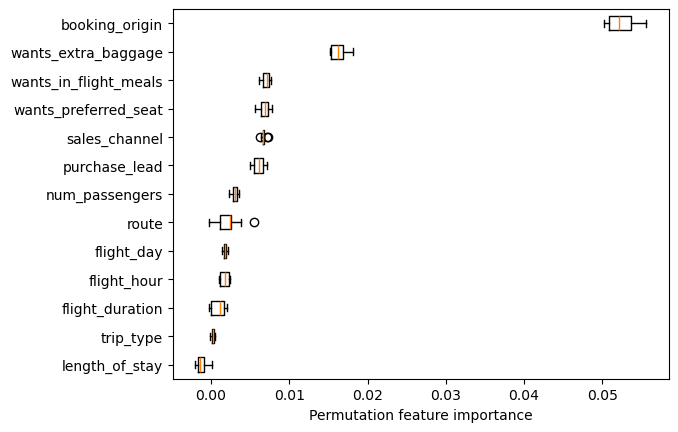

In [25]:
from sklearn.inspection import permutation_importance
def get_permutation_importance(model):
    X_train_perm = X_train.drop(columns=drop_features)
    result = permutation_importance(model, X_train_perm, y_train_num, n_repeats=10, random_state=123)
    perm_sorted_idx = result.importances_mean.argsort()
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X_train_perm.columns[perm_sorted_idx],
    )
    plt.xlabel('Permutation feature importance')
    plt.show()
get_permutation_importance(pipe_sklearn_histGB_opt)

In [26]:
pipe_lr_opt.fit(X_train, y_train)
scores_lr = mean_std_cross_val_scores(pipe_lr_opt, X_test, y_test, cv=10, scoring=scoring_metric, n_jobs=-1)

scores_lr['best_model'] = 'sklearn_histGB (Optimised)'
# convert the dictionary to a Series
best_params_lr_series = pd.Series(best_params_lr)

# concatenate the Series and the dictionary
summary_lr = pd.concat([scores_sklearn, best_params_lr_series])
print("SUMMARY OF RESULTS")
display(summary_sklearn.to_frame(''))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

SUMMARY OF RESULTS


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,
fit_time,12.555 (+/- 2.208)
score_time,0.092 (+/- 0.049)
test_accuracy,0.716 (+/- 0.010)
test_precision,0.299 (+/- 0.013)
test_recall,0.671 (+/- 0.039)
test_f1,0.413 (+/- 0.019)
best_model,sklearn_histGB (Optimised)
histgradientboostingclassifier__max_depth,13
histgradientboostingclassifier__learning_rate,0.1
histgradientboostingclassifier__class_weight,"{0: 1, 1: 5}"


In [27]:
coeffs = pipe_lr_opt.named_steps["logisticregression"].coef_.T
coeffs_df = pd.DataFrame(data=coeffs, index=X_train_enc.columns.tolist(), columns=["Coefficients"])
sorted_coeffs_df = coeffs_df.sort_values(by="Coefficients")

display(sorted_coeffs_df.head(20))
display(sorted_coeffs_df.tail(20))

,Coefficients
route_ICNSYD,-3.633721
route_ICNPER,-3.291716
route_HKTICN,-3.145454
route_DELSYD,-2.630439
route_DELDPS,-2.365276
route_ICNMEL,-2.169278
route_SYDTPE,-2.004189
route_DELMEL,-1.850150
route_CMBSYD,-1.839265
route_DPSTPE,-1.779215


,Coefficients
route_KBRMEL,1.348866
route_HKGMEL,1.372647
route_KCHPUS,1.386189
route_JHBTPE,1.392028
route_KBRTPE,1.460012
route_CGKKTM,1.477601
route_ICNJHB,1.519094
route_PENTPE,1.545170
route_PENPUS,1.654862
route_ICNPEN,1.704542
